In [10]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_plus_clustering.som import SOM
import pickle
import sys

In [7]:
df = pd.read_csv("Datas/pca_data.csv")
df.drop_duplicates(inplace=True)
df

,0,1,2
0,-0.406201,0.562698,0.046619
1,-1.868916,-0.766625,-0.437457
2,1.281616,-0.335871,-0.937883
3,-0.603288,-1.345859,-0.099509
4,-0.820188,0.121181,0.200505
...,...,...,...
62045,3.305390,0.899330,2.555961
62048,-0.778229,1.289803,2.723839
62051,-1.601930,1.176511,-0.565946
62081,-0.847109,-1.659573,0.672076


In [8]:
pkl_filename = "models/pca_model.pkl"
with open(pkl_filename, 'rb') as file:
    pca_model = pickle.load(file)

In [17]:
X = df.values
model = SOM(m = 1,
            n = 3, 
            dim=X.shape[1],
            max_iter=sys.maxsize,
            initiate_method="SOM++",
            learning_rate=0.7,
            neighbour_rad=2)
model.fit(X, epoch=50)
model.neurons

Training   | [███████████████████████████████████████ ] 98% 

array([[[-0.71631177, -0.52713381, -0.40567315],
        [ 1.31777418, -1.15496152, -0.65447458],
        [ 0.75524174,  2.61614651,  1.17296458]]])

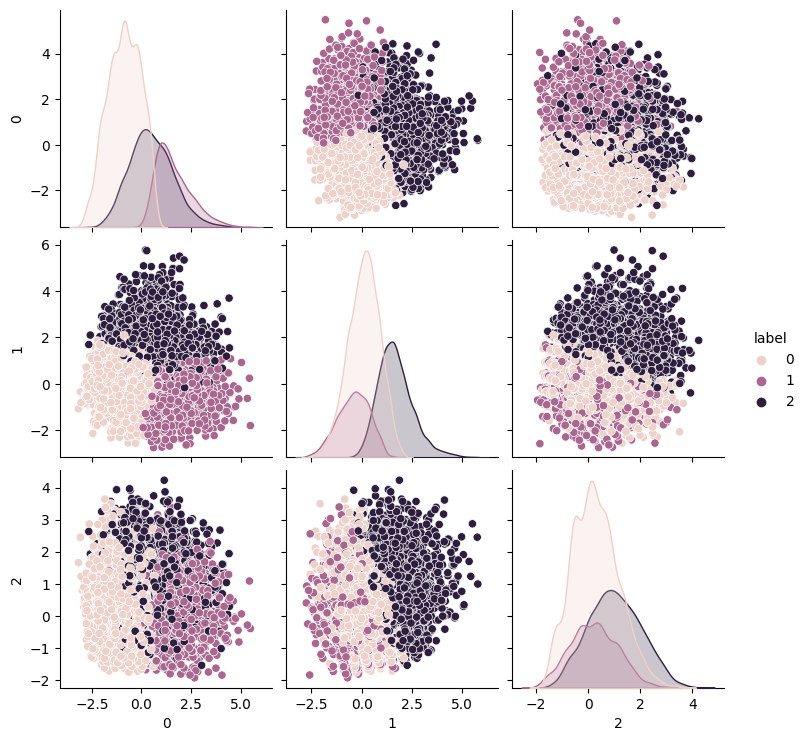

In [18]:
pred = model.predict(X)
plot_df = df.copy(deep=True)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)

In [19]:
data_cols = pd.read_csv("Datas/clear_encoded_data.csv")
cluster_data = pd.DataFrame(pca_model.inverse_transform( model.cluster_center_), columns=data_cols.columns)
cluster_data[cluster_data > .1].dropna(axis=1)

,amines,aldehyde,aromatic,cycle
0,1.683745,0.240198,1.021670,0.913703
1,3.460054,0.959674,0.695123,1.618744
2,0.818168,1.762781,0.935591,3.676131


In [ ]:
cluster_data[cluster_data > .1].dropna(axis=1).to_excel("Datas/Stats/clustercenters.xlsx", index=False)
cluster_data[cluster_data > .1].dropna(axis=1).to_csv("Datas/Stats/clustercenters.csv", index=False)